Objective: Train a sentiment classifier on a corpus of the provided documents. Your goal is to maximize accuracy. There is special interest in being able to accurately detect negative sentiment. The training data includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled. Please describe the business outcomes in your work sample including how data limitations impact your results and how these limitations could be addressed in a larger project.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from data_prep import (X_train_scale, y_train,
                       X_test_scale, y_test,
                       train_vectors, test_vectors)
from stopwords import STOPWORDS

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
train_vectors

<15171x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 176965 stored elements in Compressed Sparse Row format>

In [3]:
X_train_scale

array([[ 0.05541827,  0.17282208,  0.64005886, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.99787108, -1.14683899, -0.82146026, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.3207565 , -0.29848544, -0.23685261, ..., -0.00811909,
        -0.00811909, -0.00811909],
       ...,
       [-0.69693126, -0.76979297, -0.52915643, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [ 2.08676202,  2.05805217,  2.68618563, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.01981668, -0.01570093,  0.05545122, ..., -0.00811909,
        -0.00811909, -0.00811909]])

In [4]:
clf = SVC(gamma='auto', kernel='linear', random_state=0)

In [5]:
clf.fit(train_vectors, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Confusion Matrix
[[ 677  479  166]
 [ 243 1729  260]
 [ 202  455  846]]


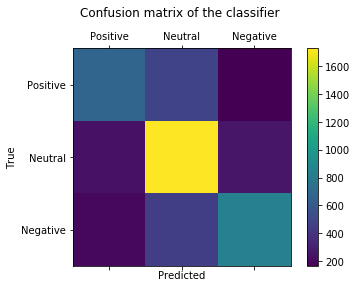

Accuracy is 0.6430690132489618 


In [6]:
y_pred = clf.predict(test_vectors)
cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix")
print(cm)
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

In [7]:
scores = cross_val_score(clf, train_vectors, y_train, cv=5, scoring="accuracy")

In [8]:
scores

array([0.63822076, 0.63019117, 0.63414634, 0.64798945, 0.63843111])

Data limitations:

-- Lack of full stopwords list

-- Compressed sparse data is quicker to compute than arrays.

Submit your work sample as a single pdf or html file that is comprehensive with respect to your thought process, code, findings, and recommendations (ie a notebook). You may submit other documents if you wish, but compressed files will not be accepted.